In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
train_data = pd.read_csv("/content/train 2.csv")
test_data = pd.read_csv("/content/test 2.csv")

In [ ]:
train_data.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3.0,3.0,3.0,0.0,0.0,satisfied


In [ ]:
test_data.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
train_data.shape


(71549, 25)

In [ ]:
test_data.shape


(25976, 25)

In [ ]:
train_data.isnull().sum()


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        1
Inflight service                       1
Cleanliness                            1
Departure Delay in Minutes             1
Arrival Delay in Minutes             220
satisfaction    

In [ ]:
test_data.isnull().sum()


Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace =True)


In [ ]:
train_data.isnull().sum()


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
def drops(data):
  data.drop({"Unnamed: 0","id"},axis=1,inplace=True)
  
  data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
  data["Customer Type"] = data["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
  data["Type of Travel"] = data["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
  data = pd.get_dummies(data,columns = ["Class"])

  return data

In [ ]:
train_data["Class"].value_counts()


Business    34097
Eco         32089
Eco Plus     5143
Name: Class, dtype: int64

In [ ]:
data = drops(train_data)


In [ ]:
data.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,13,0,460,3,4,3,1,5,...,4,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied,0,0,1
1,1,0,25,1,235,3,2,3,3,1,...,3,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,...,4,4.0,4.0,5.0,0.0,0.0,satisfied,1,0,0
3,0,1,25,1,562,2,5,5,5,2,...,3,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied,1,0,0
4,1,1,61,1,214,3,3,3,3,4,...,4,3.0,3.0,3.0,0.0,0.0,satisfied,1,0,0


In [ ]:
data_test = drops(test_data)


In [ ]:
data_test.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,satisfied,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,satisfied,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,satisfied,0,1,0


In [ ]:
ytrain_target = data["satisfaction"]
xtrain_feature = data.drop({"satisfaction"},axis=1)


In [ ]:
xtrain_feature.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,13,0,460,3,4,3,1,5,...,3,4,4.0,5.0,5.0,25.0,18.0,0,0,1
1,1,0,25,1,235,3,2,3,3,1,...,5,3,1.0,4.0,1.0,1.0,6.0,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,...,3,4,4.0,4.0,5.0,0.0,0.0,1,0,0
3,0,1,25,1,562,2,5,5,5,2,...,5,3,1.0,4.0,2.0,11.0,9.0,1,0,0
4,1,1,61,1,214,3,3,3,3,4,...,4,4,3.0,3.0,3.0,0.0,0.0,1,0,0


In [ ]:

ytest_target = data_test["satisfaction"]
xtest_feature = data_test.drop({"satisfaction"},axis=1)

In [ ]:
xtest_feature.head()


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,0,1,0


In [ ]:
ytrain_target.head()


0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [ ]:
ytrain_target.value_counts()


neutral or dissatisfied    40304
satisfied                  31025
Name: satisfaction, dtype: int64

In [ ]:
y_train = ytrain_target.map({"neutral or dissatisfied":0,"satisfied":1})
y_test = ytest_target.map({"neutral or dissatisfied":0,"satisfied":1})


In [ ]:
y_train.head()


0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [ ]:
y_test.head()


0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

<Axes: xlabel='Online boarding', ylabel='count'>

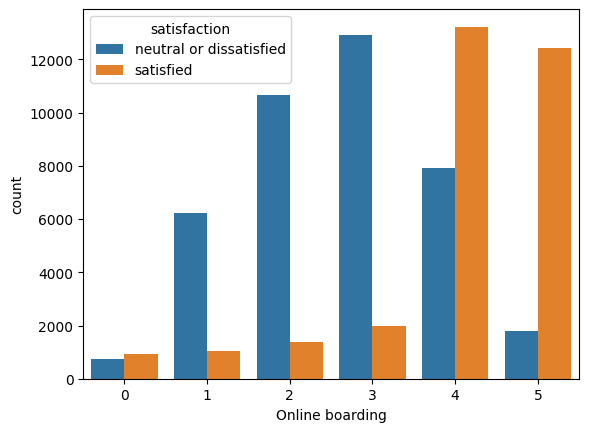

In [ ]:
sns.countplot(x="Online boarding",hue="satisfaction",data=train_data)


<Axes: xlabel='Customer Type', ylabel='count'>

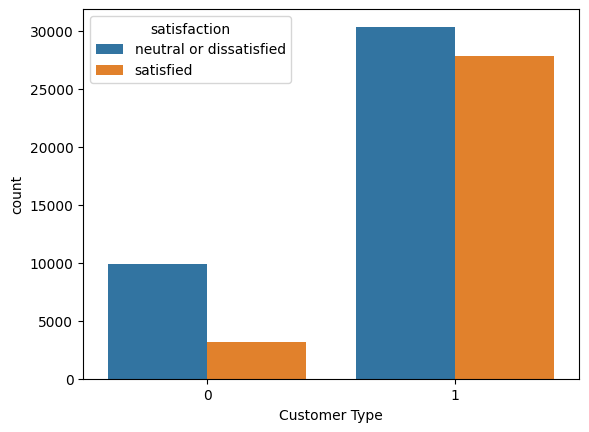

In [ ]:
sns.countplot(x="Customer Type",hue="satisfaction",data=train_data)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_feature,y_train)


RandomForestClassifier()

In [ ]:
pred = rfc.predict(xtest_feature)


In [ ]:
accuracy_score(y_test,pred)


0.9611091800872823